In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [22]:
meta_df = pd.read_csv('symbols_valid_meta.csv')
print("Total Tickers:", len(meta_df))

# Show first few rows to confirm csv loads
meta_df.head()


Total Tickers: 8049


,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [45]:
# Filter Stocks
filtered = meta_df[(meta_df['ETF'] == 'N') & (meta_df['Symbol'].notnull())]
tickers = filtered['Symbol'].unique()[:1]
print("Selected ticker:", tickers[0])
ticker = 'AAPL'

# Download Stock Price Data
df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
df = df[['Close']]
print("Downloaded data shape:", df.shape)
print(df.head())

N = 5
for i in range(1, N + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

X = df[[f'lag_{i}' for i in range(1, N + 1)]]
y = df['Close']

print("X shape:", X.shape)
print("y shape:", y.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

[*********************100%***********************]  1 of 1 completed

Selected ticker: A
Downloaded data shape: (1257, 1)
Price           Close
Ticker           AAPL
Date                 
2020-01-02  72.716072
2020-01-03  72.009117
2020-01-06  72.582909
2020-01-07  72.241547
2020-01-08  73.403656
X shape: (1252, 5)
y shape: (1252, 1)

Model Performance:
MSE: 8.578277213078033
R^2 Score: 0.9868476980591439


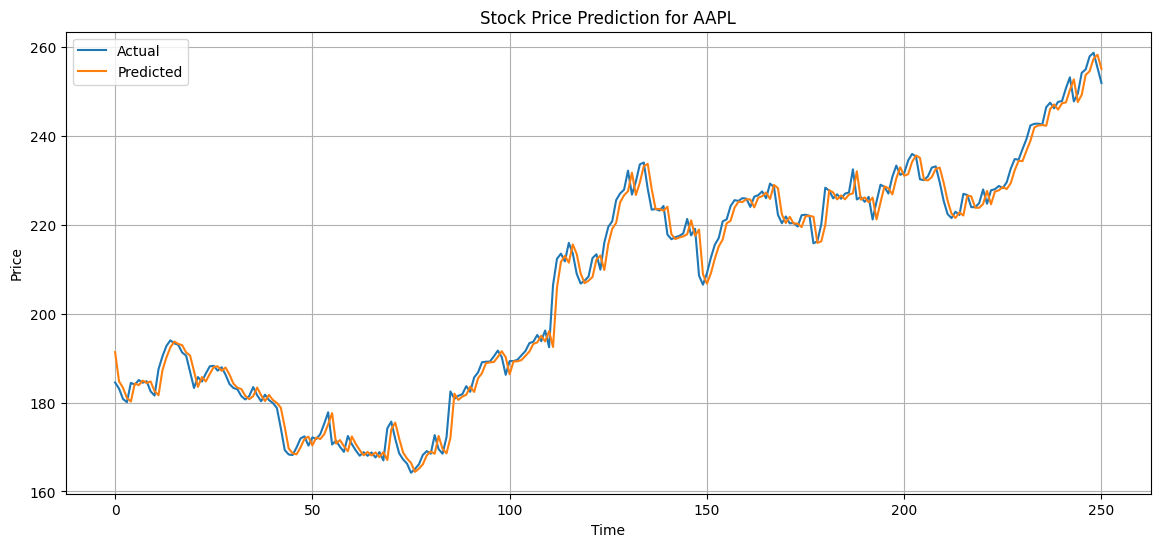

In [46]:
# The plot results

plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'Stock Price Prediction for {ticker}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Advanced ML model (CNN) (1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape X to (samples, timesteps, features)
X_cnn = np.array(X).reshape((X.shape[0], X.shape[1], 1))
y_cnn = np.array(y)

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))  # Outputs the predicted price

cnn_model.compile(optimizer='adam', loss='mse')

cnn_model.fit(X_cnn, y_cnn, epochs=20, batch_size=16, validation_split=0.2, verbose=1)

y_pred_cnn = cnn_model.predict(X_cnn)

print("CNN MSE:", mean_squared_error(y_cnn, y_pred_cnn))
print("CNN R^2 Score:", r2_score(y_cnn, y_pred_cnn))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 1884.9260 - val_loss: 104.2879
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 71.4807 - val_loss: 73.5463
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 64.5625 - val_loss: 60.4668
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 53.1593 - val_loss: 54.3835
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 40.8977 - val_loss: 111.6806
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 42.5637 - val_loss: 37.0451
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 33.1709 - val_loss: 58.7243
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 30.1599 - val_loss: 27.8578
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 25.3682 - val_loss: 61.5365
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.3790 - val_loss: 113.6088
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 28.4305 - val_loss: 25.0243
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms

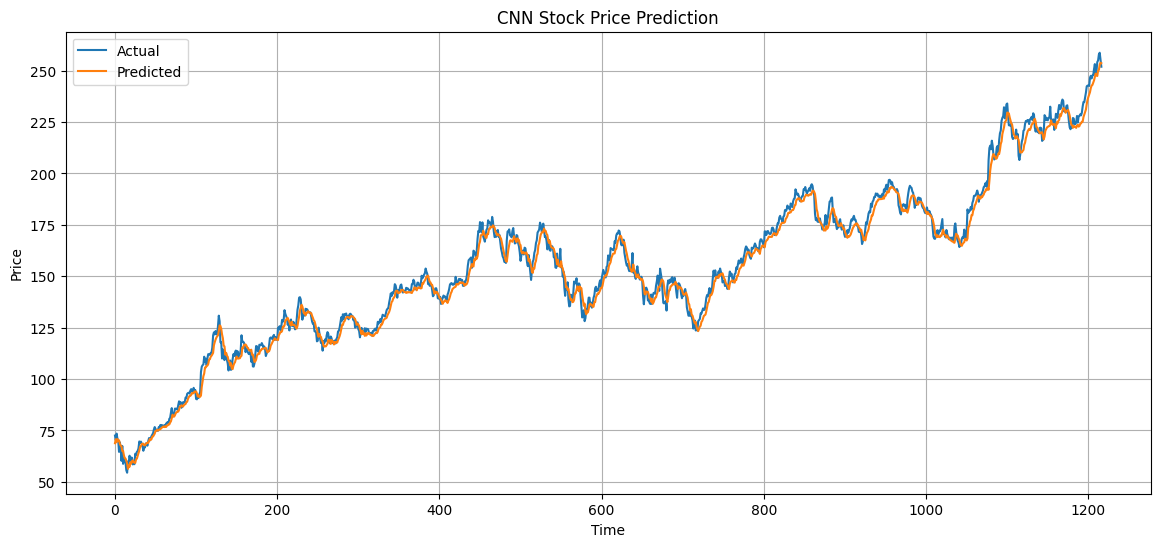

In [37]:
# Plot of Actual vs Predicted using CNN for AAPL

plt.figure(figsize=(14, 6))
plt.plot(y_cnn, label='Actual')
plt.plot(y_pred_cnn, label='Predicted')
plt.title("CNN Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.9556 - val_loss: 46.7990
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 22.6826 - val_loss: 30.0744
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.5674 - val_loss: 21.9779
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.4091 - val_loss: 20.9349
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0572 - val_loss: 19.7435
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 18.5508 - val_loss: 37.8988
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 21.9502 - val_loss: 25.9178
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 17.5694 - val_loss: 20.0156
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 15.9401 - val_loss: 33.5312
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 17.8969 - val_loss: 16.5776
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.6819 - val_loss: 27.5122
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/ste

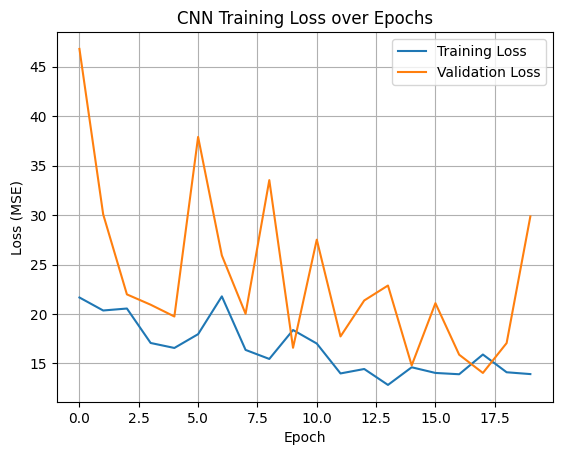

In [33]:
# Plot Training Loss Trajectory (2)

history = cnn_model.fit(
    X_cnn, y_cnn,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()